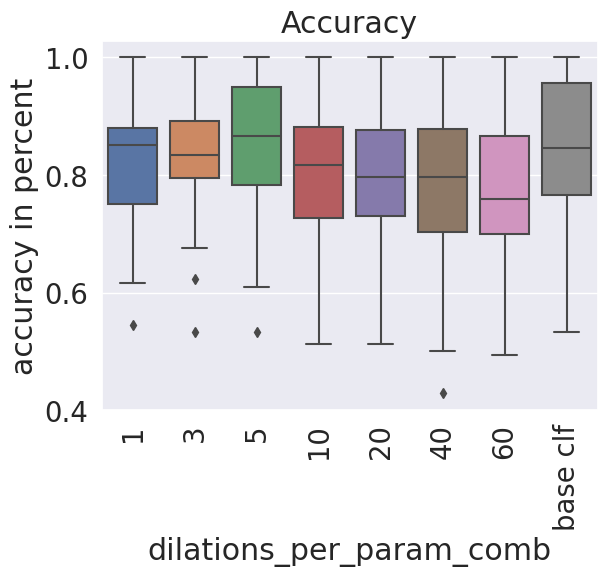

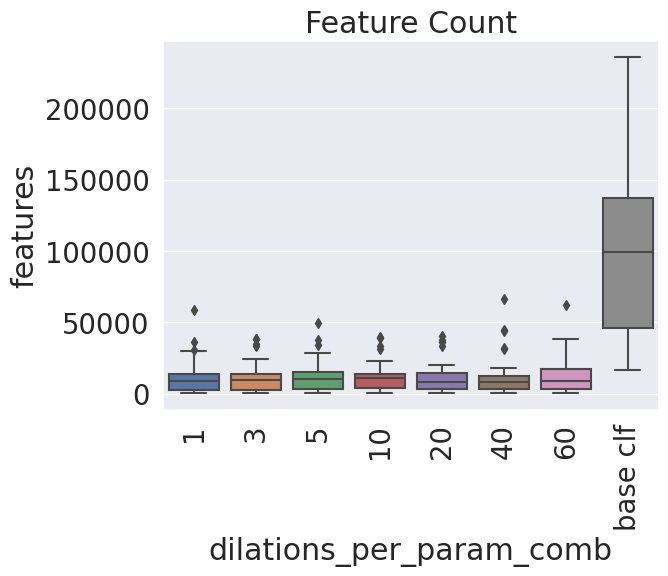

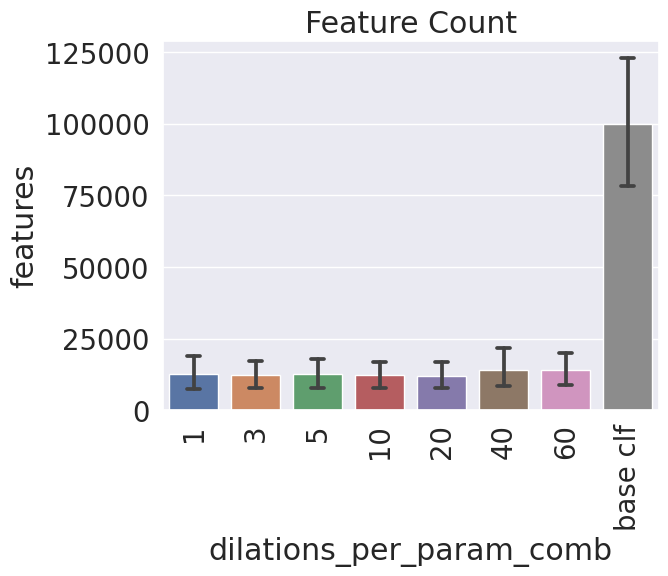

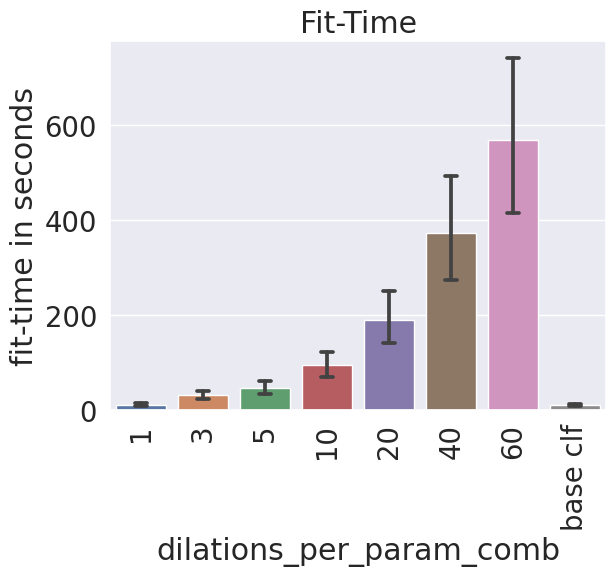

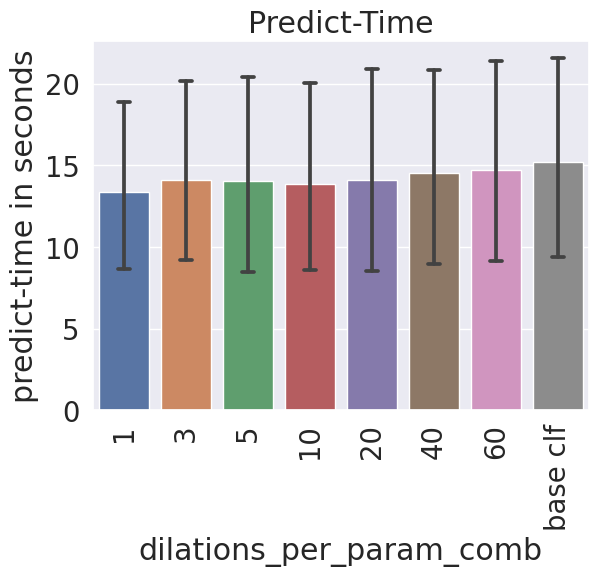

<Figure size 640x480 with 0 Axes>

In [1]:
import visualize
import pandas as pd

benchmark_name = "CBOSS_DILATION0_dilations_per_param_comb" #anpassen
save_plots = True
base_column = 'dilations_per_param_comb' #anpassen

all_results_raw = pd.read_csv("./results/" + benchmark_name + "/" + benchmark_name + ".csv", index_col=0)
all_results_raw[base_column] = all_results_raw[base_column].astype(int) #ggf anpassen: type
all_results_raw.sort_values(by=[base_column], inplace=True)
all_results_raw[base_column] = all_results_raw[base_column].replace([0], 'base clf') #ggf anpassen: base clf Kennzeichnungswert ggf anpassen
all_results_grouped = all_results_raw.groupby(base_column, dropna = False)
all_results = [group for _, group in all_results_grouped]

visualize.boxplots(all_results, benchmark_name=benchmark_name, save_boxplots=save_plots, base_column=base_column)
#visualize.times(all_results, benchmark_name=benchmark_name, save_boxplots=save_plots, base_column=base_column)

# all_results_mean_raw = pd.read_csv("./results/" + benchmark_name + "/" + benchmark_name + "_av.csv", index_col=0)
# all_results_mean_raw[base_column] = all_results_mean_raw[base_column].astype(int)
# all_results_mean_raw.sort_values(by=[base_column], inplace=True)
# all_results_mean_raw[base_column] = all_results_mean_raw[base_column].replace([-1], 'base clf')
# all_results_mean_grouped = all_results_mean_raw.groupby(base_column, dropna = False)
# all_results_mean = [group for _, group in all_results_mean_grouped]
#visualize.barplots(all_results_mean, benchmark_name=benchmark_name, save_barcharts=save_plots, base_column=base_column)